In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import xml.etree.ElementTree as ET

def get_label_from_index(custom_groups, idx):
    for group in custom_groups:
        for item in group:
            if item["index"] == idx:
                return item["label"]
    return f"Index {idx}" 

In [ ]:


file_info = [
    {
        "path" : "H:\\DLR Press Data\\60percent4STACKBAR150bar03mms388g.txt",   #0
        "force_start"   : "31.07.2025 10:39:06.150461",
        "force_end"     : "31.07.2025 10:39:24.070461",
        "pos_start"     : "31.07.2025 10:39:24.070461",
        "pos_end"       : "31.07.2025 10:47:44.070461"
    },
    {
        "path" : "H:\\DLR Press Data\\60percent4STACKBAR150bar07mms384g.txt",   #1
        "force_start"   : "31.07.2025 10:18:27.193997",
        "force_end"     : "31.07.2025 10:18:35.113997",
        "pos_start"     : "31.07.2025 10:18:35.113997",
        "pos_end"       : "31.07.2025 10:26:55.113997"
    },
    {
        "path" : "H:\\DLR Press Data\\60percent4STACKBAR150bar11mms414g.txt",   #2  
        "force_start"   : "30.07.2025 13:43:44.197899",
        "force_end"     : "30.07.2025 13:43:49.057899",
        "pos_start"     : "30.07.2025 13:43:49.057899",
        "pos_end"       : "30.07.2025 13:52:09.057899"
    },
    {
        "path" : "H:\\DLR Press Data\\60percent4STACKCENTER150bar03mms396g.txt",    #3
        "force_start"   : "29.07.2025 15:27:01.321079",
        "force_end"     : "29.07.2025 15:27:19.181079",
        "pos_start"     : "29.07.2025 15:27:19.181079",
        "pos_end"       : "29.07.2025 15:34:39.181079"
    },
    {
        "path" : "H:\\DLR Press Data\\60percent4STACKCENTER150bar07mms398g.txt",    #4
        "force_start"   : "30.07.2025 12:19:49.167098",
        "force_end"     : "30.07.2025 12:19:57.487098",
        "pos_start"     : "30.07.2025 12:19:57.487098",
        "pos_end"       : "30.07.2025 12:28:17.487098"
    },
    {
        "path" : "H:\\DLR Press Data\\60percent4STACKCENTER150bar11mms393g.txt",    #5
        "force_start"   : "30.07.2025 12:46:38.439119",
        "force_end"     : "30.07.2025 12:46:43.619119",
        "pos_start"     : "30.07.2025 12:46:43.619119",
        "pos_end"       : "30.07.2025 12:53:03.619119"
    },
    {
        "path" : "H:\\DLR Press Data\\60percent4STACKCENTER200bar11mms365g.txt",    #6
        "force_start"   : "31.07.2025 11:00:47.633201",
        "force_end"     : "31.07.2025 11:00:53.213201",
        "pos_start"     : "31.07.2025 11:00:53.213201",
        "pos_end"       : "31.07.2025 11:09:13.213201"
    },
    {
        "path" : "H:\\DLR Press Data\\80percent4STACKBAR150bar03mms508g.txt",   #7
        "force_start"   : "30.07.2025 11:47:26.451826",
        "force_end"     : "30.07.2025 11:47:42.371826",
        "pos_start"     : "30.07.2025 11:47:42.371826",
        "pos_end"       : "30.07.2025 11:56:02.371826"
    },
    {
        "path" : "H:\\DLR Press Data\\80percent4STACKBAR150bar07mms525g.txt",   #8
        "force_start"   : "31.07.2025 14:21:37.055615",
        "force_end"     : "31.07.2025 14:21:43.535615",
        "pos_start"     : "31.07.2025 14:21:43.535615",
        "pos_end"       : "31.07.2025 14:30:03.535615"
    },
    {
        "path" : "H:\\DLR Press Data\\80percent4STACKBAR150bar11mms531g.txt",   #9
        "force_start"   : "31.07.2025 14:49:31.716399",
        "force_end"     : "31.07.2025 14:49:35.816399",
        "pos_start"     : "31.07.2025 14:49:35.816399",
        "pos_end"       : "31.07.2025 14:57:55.816399"
    },
    {
        "path" : "H:\\DLR Press Data\\80percent4STACKCENTER150bar03mms542g.txt",    #10
        "force_start"   : "31.07.2025 09:07:08.361246",
        "force_end"     : "31.07.2025 09:07:23.161246",
        "pos_start"     : "31.07.2025 09:07:23.161246",
        "pos_end"       : "31.07.2025 09:15:43.161246"
    },
    {
        "path" : "H:\\DLR Press Data\\80percent4STACKCENTER150bar07mms527g.txt",    #11
        "force_start"   : "30.07.2025 15:33:47.945013",
        "force_end"     : "30.07.2025 15:33:54.465013",
        "pos_start"     : "30.07.2025 15:33:54.465013",
        "pos_end"       : "30.07.2025 15:42:14.465013"
    },
    {
        "path" : "H:\\DLR Press Data\\80percent4STACKCENTER150bar11mms543g.txt",    #12
        "force_start"   : "31.07.2025 09:56:19.454633",
        "force_end"     : "31.07.2025 09:56:23.494633",
        "pos_start"     : "31.07.2025 09:56:23.494633",
        "pos_end"       : "31.07.2025 10:04:43.494633"  
    },
    {
        "path" : "H:\\DLR Press Data\\SPLITCONF80percent4STACKBAR150bar03mms518g.txt",  #13
        "force_start"   : "31.07.2025 15:16:03.864139",
        "force_end"     : "31.07.2025 15:16:18.464139",
        "pos_start"     : "31.07.2025 15:16:18.464139",
        "pos_end"       : "31.07.2025 15:24:38.464139"  
    }
]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


custom_groups = [
    [0, 1, 2],    
    [3, 4, 5],    
    [7, 8, 9],
    [10, 11, 12]         
]
custom_groups = [
    [  # 60% BAR config
        {"index": 0, "label": "60% BAR 0.3 mm/s"},
        {"index": 1, "label": "60% BAR 0.7 mm/s"},
        {"index": 2, "label": "60% BAR 1.1 mm/s"}
    ],
    [  # 60% CENTER config
        {"index": 3, "label": "60% CENTER 0.3 mm/s"},
        {"index": 4, "label": "60% CENTER 0.7 mm/s"},
        {"index": 5, "label": "60% CENTER 1.1 mm/s"}
    ],
    [  # 80% BAR
        {"index": 7, "label": "80% BAR 0.3 mm/s"},
        {"index": 8, "label": "80% BAR 0.7 mm/s"},
        {"index": 9, "label": "80% BAR 1.1 mm/s"}
    ],
    [  # 80% BAR
        {"index": 10, "label": "80% CENTER 0.3 mm/s"},
        {"index": 11, "label": "80% CENTER 0.7 mm/s"},
        {"index": 12, "label": "80% CENTER 1.1 mm/s"}
    ],
    

]
for group_idx, group in enumerate(custom_groups):
    plt.figure(figsize=(12, 6))  # New figure per group

    for item in group:
        info = file_info[item["index"]]
        label = item["label"]

        df = pd.read_csv(
            info["path"],
            encoding='utf-16-le',
            sep=';',
            skiprows=1,
            quotechar='"'
        )

        # Clean and rename
        df = df.rename(columns={
            'time': 'Time',
            'dbPr\\diIstPos': 'Pos',
            'dbPr\\diIstKraftGes': 'Force'
        })
        df = df[['Time', 'Pos', 'Force']]
        df['Pos'] = df['Pos'].astype(str).str.replace(',', '.', regex=False)
        df['Force'] = df['Force'].astype(str).str.replace(',', '.', regex=False)
        df['Pos'] = pd.to_numeric(df['Pos'], errors='coerce')
        df['Force'] = pd.to_numeric(df['Force'], errors='coerce')
        df = df[df['Time'] != 'sec']
        df['Time'] = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S.%f')

        # Filter time
        force_start = pd.to_datetime(info["force_start"], format='%d.%m.%Y %H:%M:%S.%f')
        force_end = pd.to_datetime(info["force_end"], format='%d.%m.%Y %H:%M:%S.%f')
        force_df = df[(df['Time'] >= force_start) & (df['Time'] <= force_end)].copy()

        # Align time
        force_df['Time_seconds'] = (force_df['Time'] - force_df['Time'].iloc[0]).dt.total_seconds()

        # Plot
        plt.plot(force_df['Time_seconds'], force_df['Force'], label=label)

    plt.xlabel('Time (s)')
    plt.ylabel('Force (kN)')
    plt.title(f'Force vs Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'force_vs_time_group_{group_idx + 1}.png')
    plt.show()
    

In [ ]:
# for group_idx, group in enumerate(custom_groups):
#     plt.figure(figsize=(12, 6))  # New figure per group

#     for item in group:
#         info = file_info[item["index"]]
#         label = item["label"]

#         df = pd.read_csv(
#             info["path"],
#             encoding='utf-16-le',
#             sep=';',
#             skiprows=1,
#             quotechar='"'
#         )

#         # Clean and rename
#         df = df.rename(columns={
#             'time': 'Time',
#             'dbPr\\diIstPos': 'Pos',
#             'dbPr\\diIstKraftGes': 'Force'
#         })
#         df = df[['Time', 'Pos', 'Force']]
#         df['Pos'] = df['Pos'].astype(str).str.replace(',', '.', regex=False)
#         df['Force'] = df['Force'].astype(str).str.replace(',', '.', regex=False)
#         df['Pos'] = pd.to_numeric(df['Pos'], errors='coerce')
#         df['Force'] = pd.to_numeric(df['Force'], errors='coerce')
#         df = df[df['Time'] != 'sec']
#         df['Time'] = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S.%f')

#         # Filter time (use position times if different, or keep force times if same)
#         pos_start = pd.to_datetime(info["pos_start"], format='%d.%m.%Y %H:%M:%S.%f')
#         pos_end = pd.to_datetime(info["pos_end"], format='%d.%m.%Y %H:%M:%S.%f')
#         pos_df = df[(df['Time'] >= pos_start) & (df['Time'] <= pos_end)].copy()

#         # Align time
#         pos_df['Time_seconds'] = (pos_df['Time'] - pos_df['Time'].iloc[0]).dt.total_seconds()
#         pos_df['Displacement'] = pos_df['Pos'] - pos_df['Pos'].iloc[0]
#         # Plot displacement
#         pos_df['Displacement_smooth'] = pos_df['Displacement'].rolling(window=200, center=True).mean()

#         # Plot smoothed displacement
#         plt.plot(pos_df['Time_seconds'], pos_df['Displacement_smooth'], label=label)

#     plt.xlabel('Time (s)')
#     plt.ylabel('Displacement (mm)')
#     plt.title('Displacement vs Time (Smoothed)')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for group_idx, group in enumerate(custom_groups):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    for item in group:
        info = file_info[item["index"]]
        label = item["label"]

        df = pd.read_csv(
            info["path"],
            encoding='utf-16-le',
            sep=';',
            skiprows=1,
            quotechar='"'
        )

        # Clean and rename
        df = df.rename(columns={
            'time': 'Time',
            'dbPr\\diIstPos': 'Pos',
            'dbPr\\diIstKraftGes': 'Force'
        })
        df = df[['Time', 'Pos', 'Force']]
        df['Pos'] = df['Pos'].astype(str).str.replace(',', '.', regex=False)
        df['Force'] = df['Force'].astype(str).str.replace(',', '.', regex=False)
        df['Pos'] = pd.to_numeric(df['Pos'], errors='coerce')
        df['Force'] = pd.to_numeric(df['Force'], errors='coerce')
        df = df[df['Time'] != 'sec']
        df['Time'] = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S.%f')

        # --- Force plot ---
        force_start = pd.to_datetime(info["force_start"], format='%d.%m.%Y %H:%M:%S.%f')
        force_end = pd.to_datetime(info["force_end"], format='%d.%m.%Y %H:%M:%S.%f')
        force_df = df[(df['Time'] >= force_start) & (df['Time'] <= force_end)].copy()
        force_df['Time_seconds'] = (force_df['Time'] - force_df['Time'].iloc[0]).dt.total_seconds()
        axs[0].plot(force_df['Time_seconds'], force_df['Force'], label=label)

        # --- Displacement plot ---
        pos_start = pd.to_datetime(info["pos_start"], format='%d.%m.%Y %H:%M:%S.%f')
        pos_end = pd.to_datetime(info["pos_end"], format='%d.%m.%Y %H:%M:%S.%f')
        pos_df = df[(df['Time'] >= pos_start) & (df['Time'] <= pos_end)].copy()
        pos_df['Time_seconds'] = (pos_df['Time'] - pos_df['Time'].iloc[0]).dt.total_seconds()
        pos_df['Displacement'] = pos_df['Pos'] - pos_df['Pos'].iloc[0]
        pos_df['Displacement_smooth'] = pos_df['Displacement'].rolling(window=200, center=True).mean()
        axs[1].plot(pos_df['Time_seconds'], pos_df['Displacement_smooth'], label=label)

    # --- Customize subplots ---
    axs[0].set_title('Force vs Time')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Force (kN)')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].set_title('Displacement vs Time (Smoothed)')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Displacement (mm)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig(f'force_displacement_group_{group_idx + 1}.png')  # Saves both plots in one figure
    plt.show()


In [35]:
xml_path = r"H:\Real_data\press_force_try.xml"

# --- helper: get label from your groups ---
def get_label_from_index(custom_groups, idx):
    for group in custom_groups:
        for item in group:
            if item["index"] == idx:
                return item["label"]
    return f"Index {idx}"

# --- helper: parse Moldflow XML (time, displacement) ---
def parse_moldflow_disp(xml_path, max_points=None, disp_scale=1/1000.0):
    """
    Returns (time_s, disp_mm) from Moldflow-like XML where each <Block> has an <IndpVar Value="t"> and <DeptValues>.
    disp_scale defaults to 1/1000 to convert (e.g., micrometers -> mm). Adjust if needed.
    """
    root = ET.parse(xml_path).getroot()
    time_vals, disp_vals = [], []
    count = 0
    for t_node, block in zip(root.findall('.//Block//IndpVar'), root.findall('.//Block')):
        if (max_points is not None) and (count >= max_points):
            break
        t = float(t_node.attrib.get('Value'))
        y_text = block.find('DeptValues').text.strip()
        y = float(y_text)
        time_vals.append(t)
        disp_vals.append(y)
        count += 1
    time_vals = np.asarray(time_vals, dtype=float)
    disp_vals = np.asarray(disp_vals, dtype=float) * disp_scale  # -> mm
    return time_vals, disp_vals

real_data_directory = "H:\\Real_data\\press_force_try.xml"
areas = []
area_data = []

real_tree = ET.parse(real_data_directory)
real_root = real_tree.getroot()
real_data = []
guess_data_all = {}

count = 0

for time_block, dept_block in zip(real_root.findall('.//Block//IndpVar'), real_root.findall('.//Block')):
    if count >=  27:
        break  # Stop the loop after collecting 27 values

    time_value = time_block.attrib.get('Value')
    dept_value = dept_block.find('DeptValues').text.strip()
    real_data.append((time_value, dept_value))

    count += 1

real_data_array = np.array([(float(x), float(y)) for x, y in real_data])
real_time = real_data_array[:, 0]  
real_disp = real_data_array[:, 1]   / 1000

xml_time_offset = 0.0
xml_t, xml_pos_mm = parse_moldflow_disp(xml_path, max_points=None, disp_scale=1/1000.0)
xml_t = xml_t + xml_time_offset  # align/shift if needed
# (By starting the CSV time at 0 = force_start, the XML curve also starts at 0 if its first time is 0.)

# If you want to only show XML within the CSV window, mask it:
tmin, tmax = dfw['Time_seconds'].min(), dfw['Time_seconds'].max()
mask_xml = (xml_t >= tmin) & (xml_t <= tmax)

C:\Users\sozenosk\AppData\Local\Temp\ipykernel_38692\3870519934.py:5: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,25,26,27,82,83,84,91,92,93,94,95,96,100,101,102,103,104,105,112,113,114,118,119,120,127,128,129,130,131,132,139,140,141,142,143,144,145,146,147,151,152,153,157,158,159,163,164,165,169,170,171,175,176,177,181,182,183,187,188,189,190,191,192,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


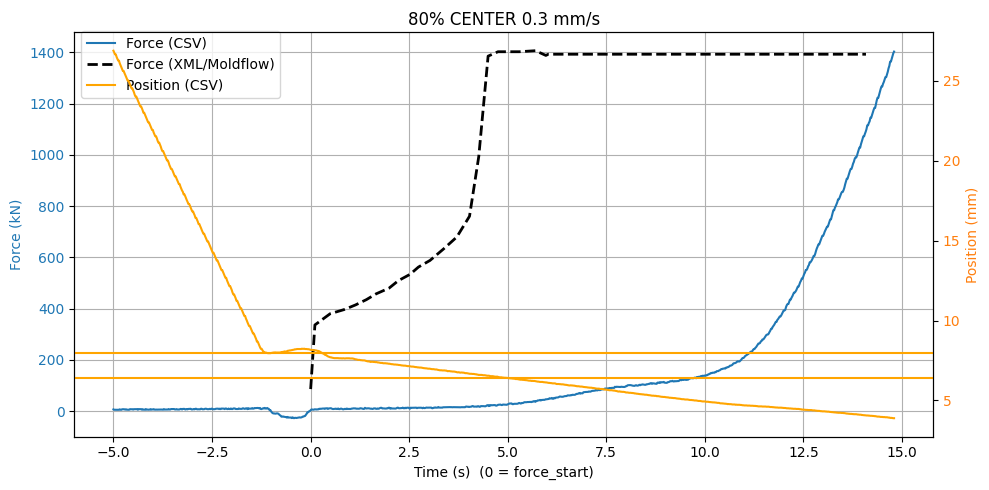

In [36]:

index = 10
info = file_info[index]
label = get_label_from_index(custom_groups, index)
# Load data
df = pd.read_csv(
    info["path"],
    encoding='utf-16-le',
    sep=';',
    skiprows=1,
    quotechar='"'
)

# Clean and rename
df = df.rename(columns={
    'time': 'Time',
    'dbPr\\diIstPos': 'Pos',
    'dbPr\\diIstKraftGes': 'Force'
})
df = df[['Time', 'Pos', 'Force']]
df['Pos'] = df['Pos'].astype(str).str.replace(',', '.', regex=False)
df['Force'] = df['Force'].astype(str).str.replace(',', '.', regex=False)
df['Pos'] = pd.to_numeric(df['Pos'], errors='coerce')
df['Force'] = pd.to_numeric(df['Force'], errors='coerce')
df = df[df['Time'] != 'sec']
df['Time'] = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S.%f')

# Force window expanded by -5 s at the start
force_start = pd.to_datetime(info["force_start"], format='%d.%m.%Y %H:%M:%S.%f')
force_end   = pd.to_datetime(info["force_end"],   format='%d.%m.%Y %H:%M:%S.%f')

window_start = force_start - pd.Timedelta(seconds=5)

# Clip to available data if needed
actual_start = max(window_start, df['Time'].min())
actual_end   = min(force_end,   df['Time'].max())

dfw = df[(df['Time'] >= actual_start) & (df['Time'] <= actual_end)].copy()

# Time zero at force_start (so pre-roll shows as negative seconds)
dfw['Time_seconds'] = (dfw['Time'] - force_start).dt.total_seconds()

# --- Plot force + position together ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# Force on left y-axis
ax1.plot(dfw['Time_seconds'], dfw['Force'], color='tab:blue', label="Force (CSV)")
ax1.set_xlabel("Time (s)  (0 = force_start)")
ax1.set_ylabel("Force (kN)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# XML Force
ax1.plot(xml_t[mask_xml], xml_pos_mm[mask_xml], linestyle='--', color='black',
         linewidth=2.0, label='Force (XML/Moldflow)')
ax1.grid(True)

# Position on right y-axis
ax2 = ax1.twinx()
ax2.plot(dfw['Time_seconds'], dfw['Pos'], color='orange', label="Position (CSV)")
ax2.axhline(8.0, color='orange', linestyle='-')
ax2.axhline(6.4, color='orange', linestyle='-')
ax2.set_ylabel("Position (mm)", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 🔑 Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0, 1.02))

plt.title(label)
fig.tight_layout()
plt.show()






In [ ]:
# --- Compute speed ---
dfw['Speed'] = np.gradient(dfw['Pos'], dfw['Time_seconds'])
dfw['Speed_smooth'] = savgol_filter(dfw['Speed'], window_length=51, polyorder=3)

# --- Find first index where smoothed speed >= 0.3 mm/s ---
target_speed = -0.3
idx = np.argmax(dfw['Speed_smooth'] >= target_speed)  # first occurrence
t_cross = dfw['Time_seconds'].iloc[idx]
s_cross = dfw['Speed_smooth'].iloc[idx]

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(dfw['Time_seconds'], dfw['Speed_smooth'], color='green', label="Smoothed Speed")
plt.axhline(y=target_speed, color='red', linestyle='--', label=f"{target_speed} mm/s")

# Vertical dashed line from curve down to x-axis
plt.axvline(x=t_cross, color='gray', linestyle='--')
plt.scatter([t_cross], [s_cross], color='black', zorder=5)  # mark crossing point


# Labels and styling
plt.xlabel("Time (s)  (0 = force_start)")
plt.ylabel("Speed (mm/s)")
plt.title(f"Speed vs Time (Smoothed) - {label}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
